[*********************100%***********************]  3 of 3 completed


Optimal Portfolio Weights: [0.4966919  0.37676849 0.12653961]
Expected Portfolio Return: 0.0005
Portfolio Volatility: 0.0078
Portfolio Sharpe Ratio: 0.0597


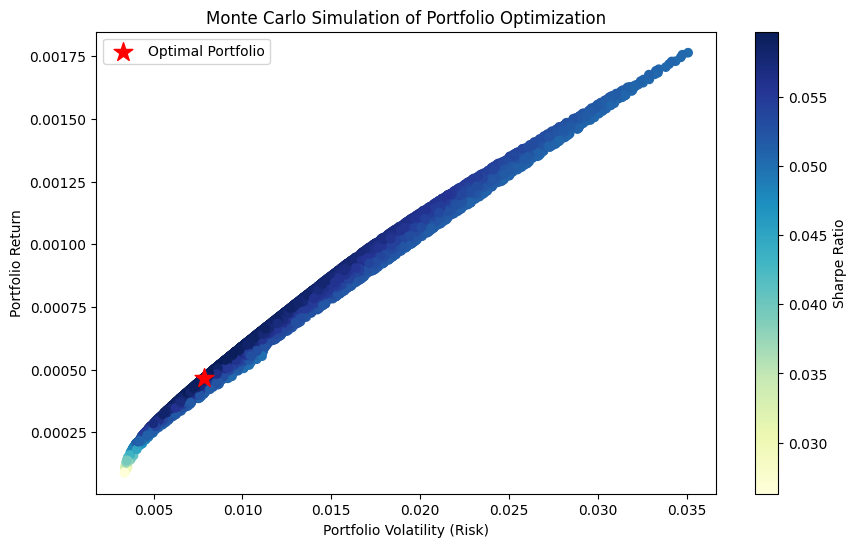

Portfolio Optimization and Visualization Completed!


In [1]:
# Importing functions from helper.py
import sys
sys.path.append('/home/bam/Desktop/week-12/scripts/') 
from Optimize_Portfolio_Based_on_Forecast_improved import load_and_preprocess_data, calculate_returns, optimize_portfolio, monte_carlo_simulation, portfolio_performance
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the historical data for the assets (Tesla, BND, SPY)
tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2024-10-31"

# Download historical stock data using the helper function
data = load_and_preprocess_data(tickers, start_date, end_date)

# Step 2: Calculate the daily returns using the helper function
returns = calculate_returns(data)

# Step 3: Calculate the mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Step 4: Optimize the portfolio to maximize the Sharpe ratio using the helper function
optimal_weights = optimize_portfolio(mean_returns, cov_matrix)
print(f"Optimal Portfolio Weights: {optimal_weights}")

# Step 5: Calculate the performance of the optimized portfolio
portfolio_return, portfolio_volatility = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
portfolio_sharpe_ratio = (portfolio_return - 0.0) / portfolio_volatility  # Assuming risk-free rate of 0%

print(f"Expected Portfolio Return: {portfolio_return:.4f}")
print(f"Portfolio Volatility: {portfolio_volatility:.4f}")
print(f"Portfolio Sharpe Ratio: {portfolio_sharpe_ratio:.4f}")

# Step 6: Visualize the Monte Carlo simulation results for portfolio optimization
results = monte_carlo_simulation(mean_returns, cov_matrix)

plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o')
plt.title("Monte Carlo Simulation of Portfolio Optimization")
plt.xlabel("Portfolio Volatility (Risk)")
plt.ylabel("Portfolio Return")
plt.colorbar(label="Sharpe Ratio")
plt.scatter(portfolio_volatility, portfolio_return, marker='*', color='r', s=200, label="Optimal Portfolio")
plt.legend()
plt.show()

# Step 7: Save the optimized portfolio and performance metrics to CSV
optimized_portfolio_df = pd.DataFrame({
    'Asset': data.columns,
    'Optimal Weight': optimal_weights
})
optimized_portfolio_df.to_csv('optimized_portfolio.csv', index=False)

performance_df = pd.DataFrame({
    'Expected Return': [portfolio_return],
    'Volatility': [portfolio_volatility],
    'Sharpe Ratio': [portfolio_sharpe_ratio]
})
performance_df.to_csv('portfolio_performance.csv', index=False)

print("Portfolio Optimization and Visualization Completed!")
